# Testing queries

### Libraries

In [2]:
%cd .. 

c:\Users\josub\Desktop\BDMA\Brussels\Advanced Databases\PROJECT\SearchEngines_benchmark


In [3]:
import pandas as pd
from src.queries import * #this import all the queries we want to test
import pyodbc
import time
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

### Connect to data base

In [9]:
# Connect to SQL Server
conn = pyodbc.connect('DRIVER={ODBC Driver 18 for SQL Server};'
                      'SERVER=localhost,1433;'
                      'DATABASE=StackOverflowMini;'
                      'UID=sa;'
                      'PWD=<YourStrong@Passw0rd>;'
                      'TrustServerCertificate=yes;')
cursor = conn.cursor()

### Executing queries test
This first step measures performance when extracting the whole table.

In [ ]:
# Initialize a list to hold query metrics
query_metrics = []

# Run benchmarks
for i in range(0,len(query_dictionary['query'])):
    counter = 0
    while counter <6:
        query = query_dictionary['query'][i]
        query_id = query_dictionary['id'][i]
    #for query in queries:
        print(f"Executing query ID {query_id}")
        start_time = time.time()
        cursor.execute(query)
        results = cursor.fetchall()
        end_time = time.time()
        
        # Collect execution time    
        execution_time = end_time - start_time
        
        # Get number of rows and columns
        columns = [column[0] for column in cursor.description]  # Get column names
        num_rows = len(results)
        num_columns = len(columns)
        
        # Append metrics to the list
        query_metrics.append({
            'query_id':query_id,
            'execution_time': execution_time,
            'run':counter
        })
        counter+=1

# Convert to pandas DataFrame

df = pd.DataFrame(query_metrics)

Executing query ID 1


In [4]:
with open('query_metrics.pickle', 'rb') as handle:
    query_metrics = pickle.load(handle)

In [19]:
# Run benchmarks
for i in range(0,len(query_dictionary['query'][6:])):
    counter = 0
    while counter <6:
        query = query_dictionary['query'][6:][i]
        query_id = query_dictionary['id'][6:][i]
    #for query in queries:
        print(f"Executing query ID {query_id}")
        start_time = time.time()
        cursor.execute(query)
        results = cursor.fetchall()
        end_time = time.time()
        
        # Collect execution time    
        execution_time = end_time - start_time
        
        # Get number of rows and columns
        columns = [column[0] for column in cursor.description]  # Get column names
        num_rows = len(results)
        num_columns = len(columns)
        
        # Append metrics to the list
        query_metrics.append({
            'query_id':query_id,
            'execution_time': execution_time,
            'run':counter
        })
        counter+=1

# Convert to pandas DataFrame

df = pd.DataFrame(query_metrics)

Executing query ID 7
Executing query ID 7
Executing query ID 7
Executing query ID 7
Executing query ID 7
Executing query ID 7
Executing query ID 8
Executing query ID 8
Executing query ID 8
Executing query ID 8
Executing query ID 8
Executing query ID 8


In [21]:
df = df[df['run']!=0]

In [23]:
df.groupby('query_id').agg({'execution_time':'mean'}).reset_index()

,query_id,execution_time
0,1,139.258105
1,2,27.204103
2,3,141.777690
3,4,26.782103
4,5,836.140143
5,6,43.550384
6,7,0.150489
7,8,0.102614


In [ ]:
# with open('query_metrics.pickle', 'wb') as handle:
#     pickle.dump(query_metrics, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Visualization of results

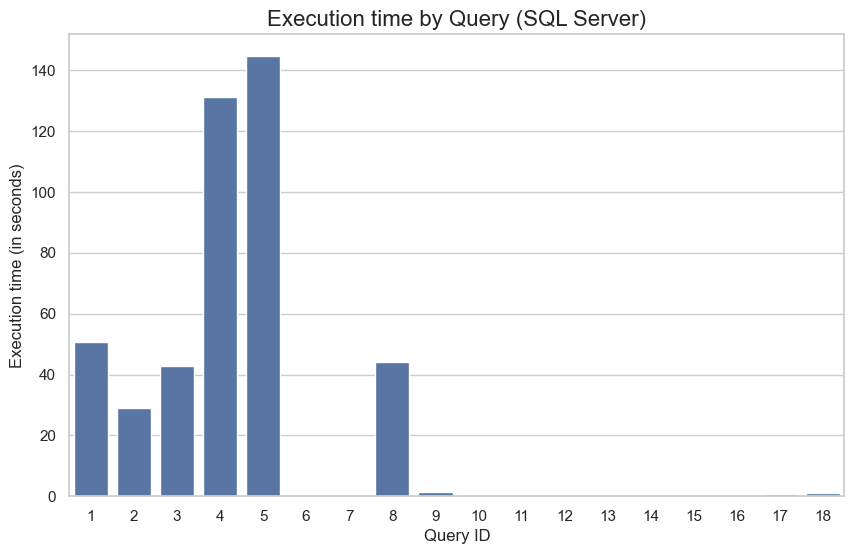

In [ ]:
# plt.figure(figsize=(10, 6))  # Set figure size
# sns.set(style="whitegrid")  # Set the style for the plot
# sns.barplot(data=df, x='query_id', y='execution_time')
# # Add title and labels
# plt.title("Execution time by Query (SQL Server)", fontsize=16)
# plt.xlabel("Query ID", fontsize=12)
# plt.ylabel("Execution time (in seconds)", fontsize=12)
# # Show the plot
# plt.show()

## Saving results

In [ ]:
# now = datetime.datetime.now()
# formatted_time = now.strftime("%Y_%m_%d_%H_%M")

In [ ]:
# df.to_csv(f'sqlserver/results/simple_test_{formatted_time}.csv')